In [2]:
# DNSGA
import time
from pymoo.algorithms.moo.dnsga2 import DNSGA2
from pymoo.core.callback import CallbackCollection, Callback
from pymoo.optimize import minimize
from pymoo.problems.dyn import TimeSimulation
from pymoo.problems.dynamic.df import DF1
import matplotlib.pyplot as plt
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import Hypervolume
from kgb import KGB, KGBMOEAD
from pymoo.util.ref_dirs import get_reference_directions
from statistics import mean
from pymoo.problems import get_problem
from pymoo.termination import get_termination
import json

# Experimental Settings
n_var = 5  # CEC 2018 requires 10 variables, 5 for showcasing purposes
change_frequency = 10  # 10 (fast changing env), 30 (slow changing env)
change_severity = 1 # severity of change 1 (high), 3 (medium), 5 (low)
pop_size = 100
max_n_gen = 30 * change_frequency  # CEC 2018: 30 * change_frequency
termination = get_termination("n_gen", max_n_gen)
problem_string = "df1"
verbose = False
seed = 1

ModuleNotFoundError: No module named 'nds'

In [ ]:
# Metric Vars / Callbacks
po_gen = []
igds = []
hvs = []
pof = []
pos = []

def reset_metrics():
    global po_gen, igds, hvs, igds_monitor, hvs_monitor, pof, pos
    po_gen = []
    igds = []
    hvs = []
    igds_monitor = []
    hvs_monitor = []
    pof = []
    pos = []

def update_metrics(algorithm):

    _F = algorithm.opt.get("F")  # get function values of current best pop
    PF = algorithm.problem._calc_pareto_front()  # calculate current Pareto-Front
    igd = IGD(PF).do(_F)  # calculate igd
    hv = Hypervolume(pf=PF).do(_F)  # calculate hypervolume
    
    # Every Generation, get POS (optimal Population), igds, gds and hv
    pos.append(algorithm.opt.get("X"))
    igds.append(igd)
    hvs.append(hv)

    po_gen.append(algorithm.opt)
    
    # Every Generation, get updated true POF
    pof.append(PF)

class DefaultDynCallback(Callback):

    def _update(self, algorithm):

        update_metrics(algorithm)

        # if algorithm.n_gen % 20 == 0:
        #     F = algorithm.opt.get("F")
        #     pf = algorithm.problem.pareto_front()

        #     plt.clf()
        #     plt.scatter(F[:, 0], F[:, 1])
        #     if pf is not None:
        #         plt.plot(pf[:, 0], pf[:, 1], color="black", alpha=0.7)

        #     plt.show()

DNSGA2 Performance
Time: 3.474975347518921
MIGDS 0.13842689494031948
MHV 0.29757439267233915


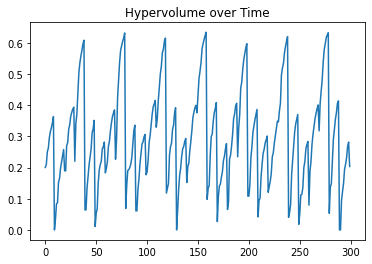

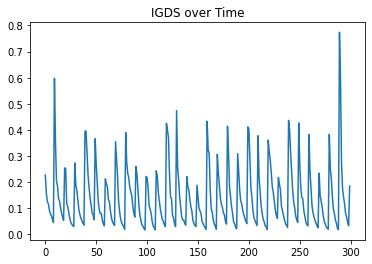

In [ ]:
# DNSGA2

problem = get_problem(problem_string, taut=change_frequency, nt = change_severity, n_var=n_var)
algorithm = DNSGA2(pop_size=pop_size)
simulation = TimeSimulation()

start = time.time()
res = minimize(problem,
               algorithm,
               termination=termination,
               callback=CallbackCollection(DefaultDynCallback(), simulation),
               seed=seed,
               verbose=verbose)

print("DNSGA2 Performance")
print(f'Time: {time.time() - start}')
print("MIGDS", mean(igds))
print("MHV", mean(hvs))

plt.title("Hypervolume over Time")
plt.plot(hvs)
plt.show()
plt.title("IGDS over Time")
plt.plot(igds)
plt.show()
reset_metrics()

KGBDMOEA Performance
Time: 80.65689492225647
MIGDS 0.022668594000845345
MHV 0.43298414087762765


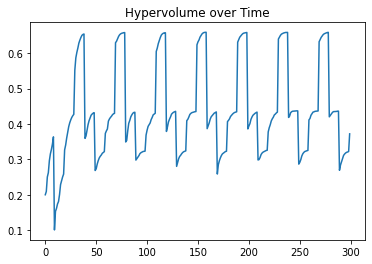

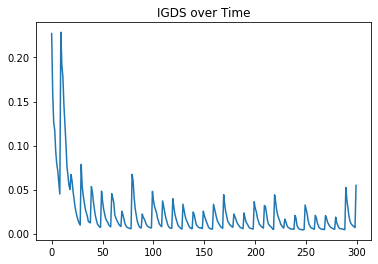

In [ ]:
# KGB-DMOEA

problem = get_problem(problem_string, taut=change_frequency, nt = change_severity, n_var=n_var)
algorithm = KGB(pop_size=pop_size, save_ps=True)
simulation = TimeSimulation()

start = time.time()
res = minimize(problem,
               algorithm,
               termination=termination,
               callback=CallbackCollection(DefaultDynCallback(), simulation),
               seed=seed,
               verbose=verbose)

print("KGBDMOEA Performance")
print(f'Time: {time.time() - start}')
print("MIGDS", mean(igds))
print("MHV", mean(hvs))

plt.title("Hypervolume over Time")
plt.plot(hvs)
plt.show()
plt.title("IGDS over Time")
plt.plot(igds)
plt.show()
reset_metrics()

KGBDMOEA Performance
Time: 82.54634928703308
MIGDS 0.019213922614551352
MHV 0.4375509916184436


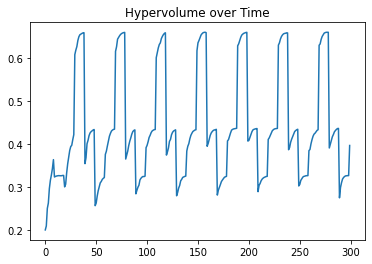

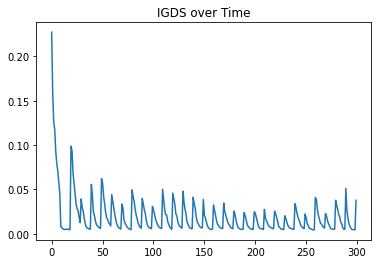

In [ ]:
# KGB-DMOA with PS Init

# load archive of POS
with open('ps.json', 'r') as f:
    ps = json.load(f)

# KGB-DMOEA
problem = get_problem(problem_string, taut=change_frequency, nt = change_severity, n_var=n_var)
algorithm = KGB(pop_size=pop_size, ps=ps, save_ps=True)
simulation = TimeSimulation()

start = time.time()
res = minimize(problem,
               algorithm,
               termination=termination,
               callback=CallbackCollection(DefaultDynCallback(), simulation),
               seed=seed,
               verbose=verbose)

print("KGBDMOEA Performance")
print(f'Time: {time.time() - start}')
print("MIGDS", mean(igds))
print("MHV", mean(hvs))

plt.title("Hypervolume over Time")
plt.plot(hvs)
plt.show()
plt.title("IGDS over Time")
plt.plot(igds)
plt.show()
reset_metrics()

KGBDMOEA Performance
Time: 733.5675621032715
MIGDS 0.11424605875792891
MHV 0.5824646108855527


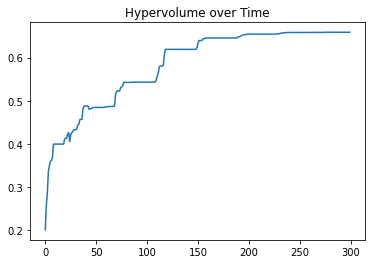

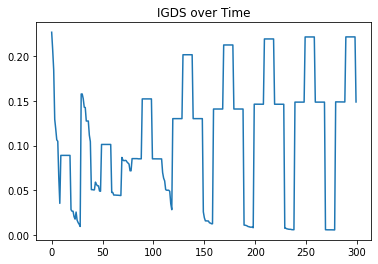

In [ ]:
# KGB-DMOA with MOEAD
problem = get_problem(problem_string, taut=change_frequency, nt = change_severity, n_var=n_var)
ref_dirs = get_reference_directions("uniform", problem.n_obj, n_partitions=100) # TODO: Read up on this
algorithm = KGBMOEAD(ref_dirs=ref_dirs)
simulation = TimeSimulation()

start = time.time()
res = minimize(problem,
               algorithm,
               termination=termination,
               callback=CallbackCollection(DefaultDynCallback(), simulation),
               seed=seed,
               verbose=verbose)

print("KGBDMOEA Performance")
print(f'Time: {time.time() - start}')
print("MIGDS", mean(igds))
print("MHV", mean(hvs))

plt.title("Hypervolume over Time")
plt.plot(hvs)
plt.show()
plt.title("IGDS over Time")
plt.plot(igds)
plt.show()
reset_metrics()